# Modelo de Probabilidad de Default (PD) con Regresión Logística

In [1]:
# Importemos Bibliotecas

In [2]:
# --- Importar Librerías Necesarias ---

# Manipulación de Datos
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas de Evaluación de Modelos
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    precision_score,
    recall_score,
    f1_score,
    log_loss
)

# Utilidades para Búsqueda de Hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilidades Varias (para la clase de p-values, si la mantienes)
import scipy.stats as stat
from sklearn import linear_model # Necesario para la clase RegresionLogistica_con_p_values

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para Pandas (opcional, pero útil para visualizar DataFrames grandes)
pd.options.display.max_rows = None

# Configuración de estilo para Seaborn (opcional, para mejorar la apariencia de los gráficos)
sns.set()

In [ ]:
# Importemos los Datos


In [4]:
independientes_evaluacion = pd.read_csv('datos_guardados_independientes_evaluacion.csv', index_col = 0)


In [5]:
dependiente_evaluacion = pd.read_csv('datos_guardados_dependiente_evaluacion.csv', index_col = 0)


In [6]:
independientes_entreno = pd.read_csv('datos_guardados_independientes_entreno.csv', index_col = 0)


In [7]:
dependiente_entreno = pd.read_csv('datos_guardados_dependiente_entreno.csv', index_col = 0)

In [8]:
# Exploremos los datos

In [9]:
independientes_entreno.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti_19.9-20.8,dti_20.8-23.2,dti_23.2-35.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_0-3,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,1,0,0,1,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,1,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,1,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,0,1,0,0,0,0,0


In [10]:
dependiente_entreno.head()

,buenos_malos
427211,1
206088,1
136020,1
412305,1
36159,0


In [11]:
independientes_entreno.shape

(373028, 278)

In [12]:
dependiente_entreno.shape

(373028, 1)

In [13]:
independientes_evaluacion.shape

(93257, 278)

In [14]:
dependiente_evaluacion.shape

(93257, 1)

In [ ]:
# Seleccionemos las variables independientes que utilizaremos en nuestro modelo
# Los df que importamos son bastante pesados y tienen varias columnas (variables)
# que no necesitamos para nuestro modelo
# Cuando construimos nuestro modelo, preferimos utilizar un df que incluya sólo las variables que realmente utilizaremos. Esto para ayudarle a la máquina.
# Utilizaremos la lista que generamos en excel (¡para esto servía!) y el método .loc

In [16]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
'morosidad_2anios_0',
'morosidad_2anios_1-4',
'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [ ]:
# Recordemos que cuando hacemos una regresión logística, no necesitamos incluir todas las variables
# dummies relacionada a cada variable categórica. Necesitamos (n-1) variables dummie de cada categoría, también guardamos en nuestra lista de excel las variables de referencia, es decir
# aquella variable con el menor Peso de la Evidencia.
# Generemos un df con las categorias de referencia

In [18]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3'
]

In [19]:
# Finalmente, generemos el df con el que haremos el fit del modelo es decir, quitemos la categoría
# de referencia para cada una de los conjuntos de variables dummies
# Esto es bien fácil con método .drop

In [20]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [21]:
independiente_entreno.head()

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
427211,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
206088,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
412305,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
36159,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Estimación del Modelo de Probabilidad de Default

In [22]:
# Importemos modelo de Regresión Logística

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
# Creamos regresion una objeto de la clase LogisticRegression

In [25]:
regresion = LogisticRegression()

In [26]:
# Como tenemos un montón de variables, queremos estar seguros que todos se van a imprimir
# Definamos que no haya un número máximo de líneas en el display:

In [27]:
pd.options.display.max_rows = None

In [28]:
# Estimamos el modelo aplicando el método fit al objeto regresion con las variables
# independientes y dependiente como parámetros
# fit estima el modelo y guarda los resultados en el objeto regresion

In [29]:
regresion.fit(independiente_entreno, dependiente_entreno)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Para obtener el intercepto de la regresión, utilizamos el método .intercept_

In [31]:
regresion.intercept_

array([0.16382979])

In [32]:
# El método .coef_ nos da los coeficientes en el orden del df de variables independientes

In [33]:
regresion.coef_

array([[ 0.16695837,  0.16099017, -0.19801219, -0.16043041, -0.16374546,
        -0.12517532, -0.12200351, -0.1285315 , -0.09335567, -0.05919374,
         0.03377862,  0.04039703,  0.3070062 ,  0.13540773,  0.28273231,
         0.4389178 ,  0.44205809,  0.63778278,  0.01774252, -0.29637884,
        -0.57733968, -0.79157277,  0.45866778,  0.34374911,  0.0564151 ,
        -0.01492928,  0.00351069,  0.02865741,  0.10509542, -0.30644076,
         0.02251753,  0.14105626, -0.08279614, -0.02656548,  0.04358309,
         0.17674256,  0.18941471,  0.28798417,  0.37079819,  0.41186237,
         0.51935623,  0.59649398,  0.56955311,  0.59002888,  0.17955411,
         0.16787473,  0.25595118,  0.26980774,  0.20964819,  0.08627254,
         0.0708091 ,  0.03555344,  0.03352058,  0.05453807,  0.23771459,
         0.28519689,  0.21747077,  0.16185333,  0.14977369,  0.07642398,
         0.04823209,  0.04060018,  0.00172895,  0.56567076,  0.7788284 ,
         1.10244709,  0.94592101,  1.11613618,  0.6

In [ ]:
# Una vez tenemos el modelo, debemos darle un formato estándar al que obtendríamos con un software de econometría omo SPSS o similares
# Creamos un array con los nombres de las variables independientes

In [35]:
nombres_var_independientes = independiente_entreno.columns.values
nombres_var_independientes

array(['Casa_MORTGAGE', 'Casa_OWN', 'Direccion_FL',
       'Direccion_AL_HI_MO_NM', 'Direccion_CA', 'Direccion_NC_ID_NJ',
       'Direccion_NY', 'Direccion_KY_LA_MD',
       'Direccion_MI_AR_AZ_VA_OK_DE_OH',
       'Direccion_MN_PA_UT_MA_RI_WA_TN_IN', 'Direccion_CT_IL',
       'Direccion_TX', 'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
       'Verificacion_Source Verified',
       'Proposito_casa_otros_boda_salud_vacacion',
       'Proposito_comprasgrandes_mejoras_carro',
       'Proposito_debt_consolidation', 'Proposito_credit_card',
       'Grados_B', 'Grados_C', 'Grados_D', 'Grados_E', 'Estado_Lista_w',
       'plazo_36', 'antiguedad_1a4', 'antiguedad_5a6', 'antiguedad_7',
       'antiguedad_8a9', 'antiguedad_10+', 'meses_credito<87',
       'meses_credito_110_126', 'meses_credito_126_155',
       'ingresos_anuales20K-30K', 'ingresos_anuales30K-40K',
       'ingresos_anuales40K-50K', 'ingresos_anuales50K-60K',
       'ingresos_anuales60K-70K', 'ingresos_anuales70K-80K',
       'ingresos_an

In [36]:
# Ahora creamos una tabla resumen con los resultados de nuestra regresión logística
# Para empezar, creamos una columna con los nombres de las variables independientes

In [37]:
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)

In [38]:
# Luego, creamos una segunda columna con los coeficientes para cada variable independiente
# Utilizamos el método .transpose para transponer (de forma vertical) los coeficientes

In [39]:
tabla_resultados ['Coeficientes'] = np.transpose(regresion.coef_)

In [ ]:
# el intercepto en la primera fila de nuestra tabla
# En primer lugar, añadimos una línea en blanco a nuestra tabla que esté por encima de todas las demás
#Utilizando el método .index añadimo 1 al índice de cada fila. Así 0 se vuelve 1, 1 -> 2...

In [41]:
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.166958
2,Casa_OWN,0.160990
3,Direccion_FL,-0.198012
4,Direccion_AL_HI_MO_NM,-0.160430
5,Direccion_CA,-0.163745
6,Direccion_NC_ID_NJ,-0.125175
7,Direccion_NY,-0.122004
8,Direccion_KY_LA_MD,-0.128532
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.093356
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.059194


In [42]:
# Ahora llenamos la línea 1 con el nombre de intercepto y su valor respectivo

In [43]:
tabla_resultados.loc[0] = ['Intercepto', regresion.intercept_[0]]
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.166958
2,Casa_OWN,0.160990
3,Direccion_FL,-0.198012
4,Direccion_AL_HI_MO_NM,-0.160430
5,Direccion_CA,-0.163745
6,Direccion_NC_ID_NJ,-0.125175
7,Direccion_NY,-0.122004
8,Direccion_KY_LA_MD,-0.128532
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.093356
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.059194


In [44]:
# Ordenemos la tabla por el número de índice usando el método .sort

In [45]:
tabla_resultados = tabla_resultados.sort_index()
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,0.163830
1,Casa_MORTGAGE,0.166958
2,Casa_OWN,0.160990
3,Direccion_FL,-0.198012
4,Direccion_AL_HI_MO_NM,-0.160430
5,Direccion_CA,-0.163745
6,Direccion_NC_ID_NJ,-0.125175
7,Direccion_NY,-0.122004
8,Direccion_KY_LA_MD,-0.128532
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.093356


# Estimando p-values para la Regresión Logística

In [ ]:
# Los p-values nos sirven para determinar cuáles de las variables independientes son estadísticamente significativas para explicar la variación de la variable dependiente
# Lamentablemente, una limitante de las Regresiones Logísticas en Python, es que no estima los
# p_values multivariable de forma directa. Sin embargo, luego de hacer una búsqueda
# podemos encontrar el código de alguien que ya resolvió este problema:
# https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d
# Aquí tenemos el código para una nueva clase que llamaremos RegresionLogistica_con_p_values
# Dentro de este código hay bastante algebra vectorial que excede el alcance del curso
# Si quieren más info de los parámetros de la función Regresión Logística.
# Documentacion: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [47]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class RegresionLogistica_con_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, solver = 'newton-cg')#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

In [48]:
# Vamos a crear un objeto de clase RegresionLogistica_con_p_values

In [49]:
reglogistica_p_values = RegresionLogistica_con_p_values()

In [50]:
# Un requisito de la función que hemos definido es que la variable dependiente sea un array
# en lugar de un dataframe, esto no es ningún problema y parano obtener un error, utilizamos .ravel()

In [ ]:
import pandas as pd
import numpy as np

# aplicar a 'independiente_entreno'

print("--- Verificando columnas con varianza cero en independiente_entreno ---")
constant_columns = []
for col in independiente_entreno.columns:
    if independiente_entreno[col].nunique() == 1:
        constant_columns.append(col)
        print(f"La columna '{col}' es constante. Su valor es: {independiente_entreno[col].iloc[0]}")

if constant_columns:
    print("\n¡ATENCIÓN! Las siguientes columnas son constantes y deben ser eliminadas:")
    print(constant_columns)

    print("\nDespués de eliminar las columnas constantes, intenta ejecutar tu modelo de nuevo.")
else:
    print("No se encontraron columnas constantes en independiente_entreno.")

--- Verificando columnas con varianza cero en independiente_entreno ---
No se encontraron columnas constantes en independiente_entreno.


In [52]:
reglogistica_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [ ]:
# Pueden obtener dos mensajes de advertencia. El primero, y más crítico, es
# "LinAlgError: Singular matrix" 
# Este error implica que al menos dos de sus variables están perfectamente correlacionadas
# Puede ser que hayan duplicado los valores de una variable en otra
# Pero lo más probables, es que cuando definimos la variable con np.where(condicion, 1, 0)
# lo hicimos mal, y todos los datos de la columna son 0 porque nunca se cumplio la condición
# Este es un error bien común y por eso se los comento, de hecho es lo que me paso a mi, 
# Como pueden ver que columnas tienen problemas: estimando el coeficiente de correlación
# Si dos variables tienen un valor de 1 (fuera de la diagonal principal) o NaN, entonces
# van a obtener el error de Singular matrix.

In [54]:
independiente_entreno.corr()

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
Casa_MORTGAGE,1.000000,-0.317181,-0.008299,0.038265,-0.137579,0.001393,-0.118575,0.028743,0.064845,0.038955,...,0.007467,0.012783,0.003559,-0.000192,-0.014827,0.004393,0.005795,-0.001802,-0.014021,0.011041
Casa_OWN,-0.317181,1.000000,0.012689,0.011103,-0.040588,0.003197,0.012151,0.012766,0.003916,-0.007704,...,-0.004699,-0.005720,-0.000207,0.003548,0.017879,-0.003095,0.002749,0.002171,0.002689,0.000112
Direccion_FL,-0.008299,0.012689,1.000000,-0.054654,-0.114574,-0.071535,-0.082768,-0.058316,-0.104011,-0.107511,...,-0.000236,0.002054,0.002729,0.002921,0.001400,0.010456,-0.007944,-0.009484,-0.003308,-0.007832
Direccion_AL_HI_MO_NM,0.038265,0.011103,-0.054654,1.000000,-0.086391,-0.053939,-0.062408,-0.043971,-0.078426,-0.081065,...,-0.001749,0.002891,0.002544,0.008082,0.008231,-0.005099,-0.004037,-0.001465,-0.000457,0.009148
Direccion_CA,-0.137579,-0.040588,-0.114574,-0.086391,1.000000,-0.113076,-0.130831,-0.092179,-0.164411,-0.169943,...,0.000420,-0.008546,-0.008587,-0.016279,-0.011354,0.015892,-0.006588,-0.002510,0.003481,-0.022959
Direccion_NC_ID_NJ,0.001393,0.003197,-0.071535,-0.053939,-0.113076,1.000000,-0.081685,-0.057553,-0.102651,-0.106105,...,-0.002214,0.000150,-0.001954,-0.006063,-0.000919,0.009304,-0.002596,-0.002372,-0.003080,-0.010436
Direccion_NY,-0.118575,0.012151,-0.082768,-0.062408,-0.130831,-0.081685,1.000000,-0.066590,-0.118769,-0.122765,...,-0.002126,-0.013428,-0.004740,-0.014512,-0.004171,0.007288,0.017578,0.011886,-0.008225,-0.012197
Direccion_KY_LA_MD,0.028743,0.012766,-0.058316,-0.043971,-0.092179,-0.057553,-0.066590,1.000000,-0.083681,-0.086496,...,0.001735,0.001183,0.001417,0.002451,-0.000181,0.002270,0.000094,0.002721,-0.002104,-0.002224
Direccion_MI_AR_AZ_VA_OK_DE_OH,0.064845,0.003916,-0.104011,-0.078426,-0.164411,-0.102651,-0.118769,-0.083681,1.000000,-0.154275,...,-0.002400,0.003278,0.003417,0.012246,0.002423,-0.031461,0.009296,0.006326,0.017380,0.023867
Direccion_MN_PA_UT_MA_RI_WA_TN_IN,0.038955,-0.007704,-0.107511,-0.081065,-0.169943,-0.106105,-0.122765,-0.086496,-0.154275,1.000000,...,0.002152,0.005293,0.002253,0.004317,0.000539,-0.011921,-0.001944,0.001393,0.005441,0.012390


In [ ]:
# El segundo tipo de mensaje de advertencia que podrían obtener es el "ConvergenceWarning," es 
# decir que el modelo no Converge. En ese caso, podrían probar aumentar el número de iteraciones
# o probar con diferentes solvers como “lbfgs”, “newton-cg” o “sag.” 
# Documentacion: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [56]:
# Una vez que hemos generado la regresión logística podemos agregar los p_values a nuestra tabla de 
# resultados
# Veamos los p_values

In [57]:
p_values = reglogistica_p_values.p_values
p_values

[1.6771952615184962e-36,
 3.454948809182119e-14,
 1.6098121400466247e-13,
 6.644383757776145e-07,
 2.670272313261707e-13,
 6.386919231761394e-06,
 2.6693761155044683e-06,
 4.504631131286152e-05,
 6.24271337661935e-05,
 0.011011004381734262,
 0.24897660883966688,
 0.14032914894347204,
 6.555656037867421e-10,
 7.888480989569891e-27,
 1.0376317980404477e-19,
 4.878873655326534e-40,
 2.636489572194207e-62,
 4.2456308651962585e-108,
 0.3352707105987929,
 1.4056296160126352e-56,
 7.533522885607013e-188,
 9.435543072516405e-259,
 8.376358555777405e-273,
 4.992034788471971e-144,
 0.0003278294143165565,
 0.5508358344629458,
 0.874943374890526,
 0.28678419218930185,
 3.6731506893032226e-12,
 0.007420698771739999,
 0.9293622856993128,
 0.002246525350235121,
 0.03965396280191234,
 0.4753578674128469,
 0.2352947007980759,
 2.028094277803045e-06,
 4.936168145235488e-07,
 1.575707195759265e-13,
 6.615417401041436e-20,
 6.964256470934026e-22,
 1.6875296139204926e-37,
 9.244342162184077e-34,
 1.0771182

In [58]:
# El intercepto no tiene un p_value, pero necesitamos un dato NaN para tener una columna de 
# dimensión consistente. Utilizamos el método append

In [59]:
p_values = np.append(np.nan, np.array(p_values))

In [60]:
p_values

array([            nan, 1.67719526e-036, 3.45494881e-014, 1.60981214e-013,
       6.64438376e-007, 2.67027231e-013, 6.38691923e-006, 2.66937612e-006,
       4.50463113e-005, 6.24271338e-005, 1.10110044e-002, 2.48976609e-001,
       1.40329149e-001, 6.55565604e-010, 7.88848099e-027, 1.03763180e-019,
       4.87887366e-040, 2.63648957e-062, 4.24563087e-108, 3.35270711e-001,
       1.40562962e-056, 7.53352289e-188, 9.43554307e-259, 8.37635856e-273,
       4.99203479e-144, 3.27829414e-004, 5.50835834e-001, 8.74943375e-001,
       2.86784192e-001, 3.67315069e-012, 7.42069877e-003, 9.29362286e-001,
       2.24652535e-003, 3.96539628e-002, 4.75357867e-001, 2.35294701e-001,
       2.02809428e-006, 4.93616815e-007, 1.57570720e-013, 6.61541740e-020,
       6.96425647e-022, 1.68752961e-037, 9.24434216e-034, 1.07711820e-027,
       1.21642869e-015, 4.34734889e-004, 4.47824327e-004, 1.23409676e-005,
       1.56296142e-005, 1.97382727e-004, 2.67566620e-001, 3.65026978e-001,
       2.82950960e-001, 3

In [61]:
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,0.163830
1,Casa_MORTGAGE,0.166958
2,Casa_OWN,0.160990
3,Direccion_FL,-0.198012
4,Direccion_AL_HI_MO_NM,-0.160430
5,Direccion_CA,-0.163745
6,Direccion_NC_ID_NJ,-0.125175
7,Direccion_NY,-0.122004
8,Direccion_KY_LA_MD,-0.128532
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.093356


In [62]:
# Agreguemos una tercera columna

In [63]:
tabla_resultados['p_values'] = p_values

In [64]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,0.163830,NaN
1,Casa_MORTGAGE,0.166958,1.677195e-36
2,Casa_OWN,0.160990,3.454949e-14
3,Direccion_FL,-0.198012,1.609812e-13
4,Direccion_AL_HI_MO_NM,-0.160430,6.644384e-07
5,Direccion_CA,-0.163745,2.670272e-13
6,Direccion_NC_ID_NJ,-0.125175,6.386919e-06
7,Direccion_NY,-0.122004,2.669376e-06
8,Direccion_KY_LA_MD,-0.128532,4.504631e-05
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.093356,6.242713e-05


# Seleccionando Variable con p-values

In [ ]:
# Seleccion de las variables dummies relacionadas a la variable incidencias de morosidad
# durante los últimos 2 años, ya que no estadísticamente significativa de acuerdo a su p-value
# morosidad_2anios_0
# morosidad_2anios_1-4

In [66]:
# Remuevo las variables dummies relacionadas a morosidad_2anios del df de variables independientesoriginal

In [67]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [68]:
# Hago lo mismo con las categorías de referencia

In [69]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3']

In [70]:
# Reutilizo el código para quitar las variables de referencia de las variables independientes 
# del modelo

In [71]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [72]:
independiente_entreno.shape

(373028, 67)

In [73]:
# Definamos los objetos regresion2 y regresion2_p_values

In [74]:
regresion2 = regresion = LogisticRegression(solver = 'newton-cg')
regresion2_p_values = RegresionLogistica_con_p_values()

In [75]:
# Hacemos el fit del modelo

In [76]:
regresion2.fit(independiente_entreno, dependiente_entreno.values.ravel())
regresion2_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [77]:
# Reciclamos el código para hacer la tabla

In [78]:
nombres_var_independientes = independiente_entreno.columns.values
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)
tabla_resultados['Coeficientes'] = np.transpose(regresion2.coef_)
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados.loc[0] = ['Intercepto', regresion2.intercept_[0]]
tabla_resultados = tabla_resultados.sort_index()
p_values = regresion2_p_values.p_values
p_values = np.append(np.nan, np.array(p_values))
tabla_resultados['p_values'] = p_values

In [79]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,0.062244,NaN
1,Casa_MORTGAGE,0.166736,1.818475e-36
2,Casa_OWN,0.160919,3.481165e-14
3,Direccion_FL,-0.196218,1.623425e-13
4,Direccion_AL_HI_MO_NM,-0.159536,6.643470e-07
5,Direccion_CA,-0.162597,2.692614e-13
6,Direccion_NC_ID_NJ,-0.124369,6.347568e-06
7,Direccion_NY,-0.120332,2.609278e-06
8,Direccion_KY_LA_MD,-0.127509,4.493617e-05
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.091906,6.227433e-05


# Validación del Modelo PD

In [ ]:
# la base de evaluación (testing), partimos la base original para guardar unos datos y poder evaluar que tan bueno es nuestro modelo

In [81]:
# Comencemos seleccionando las variables de nuestro modelo (deben ser las mismas de la base de entrenamiento)

In [82]:
independientes_evaluacion_modelo = independientes_evaluacion.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [83]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3']

In [84]:
# Quitamos las variable de referencia de la base de dummies de evaluación

In [85]:
independiente_evaluacion = independientes_evaluacion_modelo.drop(categorias_referencia, axis = 1)

In [86]:
independiente_evaluacion.shape

(93257, 67)

In [87]:
independiente_entreno.shape

(373028, 67)

In [88]:
# Una vez que tenemos una base de evalución con las mismas 74 variables dummies de la
# base de entreno, estamos listos para aplicar el Modelo PD que ya tenemos en la base
# de evaluación


In [89]:
prediccion_y = regresion2.predict(independiente_evaluacion)

In [90]:
# Como funciona el modelo:
# 1. Me multiplican los valores de las variables dummies (1-0) por su respectivo coeficiente (Beta)
# El resultado es el logartimo de las probabilidades (odds) de ser un buen cliente (no caer en default)
# 2. Se estima la exponencial (e) del resultado anterior para obtener la probabilidad de ser un buen cliente
# 3. Finalmente, se determina un punto de corte para categorizar las probabilidades de ser bueno o malo
# El punto de corte por default es 0.5. Pero si se conocen los costos de ser bueno o malo, se puede
# determinar el punto de corte que optimice la función de utilidad.

In [91]:
prediccion_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
# Las predicciones anteriores fueron categorizadas con un punto de corte de 0.5
# Si nosotros deseamos hacer esta categorización, necesitamos las probabilidades

In [93]:
probabilidad_y = regresion2.predict_proba(independiente_evaluacion)

In [94]:
probabilidad_y

array([[0.14239023, 0.85760977],
       [0.12759479, 0.87240521],
       [0.06393196, 0.93606804],
       ...,
       [0.04439767, 0.95560233],
       [0.08004969, 0.91995031],
       [0.08463477, 0.91536523]])

In [95]:
# Obtuvimos un array de arrays. Para cada una de las 46,629 observarciones tenemos dos valores
# La probabilidad de ser un mal cliente (PD) y la probabilidad de ser un buen cliente (1-PD)
# Generemos un array con la probabilidad de ser buen cliente

In [96]:
probabilidad_bueno = probabilidad_y[:,1]

In [97]:
probabilidad_bueno

array([0.85760977, 0.87240521, 0.93606804, ..., 0.95560233, 0.91995031,
       0.91536523])

In [98]:
# Ahora generemos un df con dos columnas:
# 1. Con los valores reales de bueno-malo de la base evaluación
# 2. Con las probabilidades que acabamos de estimar
# No podemos simplemente concatenar un df con un array con diferentes índices.
# Debemos extraer primero los valores reales y quitar los índices

In [99]:
valores_reales = dependiente_evaluacion

In [100]:
valores_reales.head()

,buenos_malos
362514,1
288564,1
213591,1
263083,1
165001,1


In [101]:
valores_reales.reset_index(drop = True, inplace = True)

In [102]:
valores_reales.head()

,buenos_malos
0,1
1,1
2,1
3,1
4,1


In [103]:
# Ahora sí concatenemos

In [104]:
df_prediccion = pd.concat([valores_reales, pd.DataFrame(probabilidad_bueno)], axis = 1)

In [105]:
df_prediccion.head()

,buenos_malos,0
0,1,0.857610
1,1,0.872405
2,1,0.936068
3,1,0.912930
4,1,0.952141


In [106]:
# Cambiemos los nombres de las columnas

In [107]:
df_prediccion.columns = ['Real', 'Proba_Prediccion']

In [108]:
df_prediccion.head()

,Real,Proba_Prediccion
0,1,0.857610
1,1,0.872405
2,1,0.936068
3,1,0.912930
4,1,0.952141


In [109]:
# Pongamos los indices de la base de evalucion para que sepamos quien es cada cliente

In [110]:
df_prediccion.index = independiente_evaluacion.index

In [111]:
df_prediccion.head()

,Real,Proba_Prediccion
362514,1,0.857610
288564,1,0.872405
213591,1,0.936068
263083,1,0.912930
165001,1,0.952141


# Matriz de Confusión

In [112]:
# Definamos la predicción a partir de las probabilidades y un punto de corte

In [113]:
punto_de_corte = 0.80

In [114]:
df_prediccion['Prediccion'] = np.where(df_prediccion['Proba_Prediccion'] > punto_de_corte, 1, 0)

In [115]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion
362514,1,0.857610,1
288564,1,0.872405,1
213591,1,0.936068,1
263083,1,0.912930,1
165001,1,0.952141,1


In [116]:
# Generemos la matriz de confusion con el método .crosstab de pandas
# Parámetros: (valores reales, predicciones, nombre filas, nombre columnas)

In [117]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones'])

Predicciones,0,1
Valores Reales,,
0,709,8081
1,2737,81730


In [ ]:
# También podríamos estimar la matriz de confusión en porcentajes. Dividamos cada uno de los valores por el total de observaciones (número de filas)

In [119]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]

Predicciones,0,1
Valores Reales,,
0,0.007603,0.086653
1,0.029349,0.876395


In [120]:
# Métrica de Exactitud (Accuracy)
# (Verdaderos Positivos + Verdaderos Negativos) / Total

In [121]:
VP = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[1,1]
VP

0.8763953376154069

In [122]:
VN = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[0,0]
VN

0.00760264645013243

In [123]:
Exactitud = VP + VN 

In [124]:
Exactitud

0.8839979840655393

In [ ]:
# El modelo tiene una exactitud relativamente alta del 88% y hace un gran trabajo prediciendo a los 
# buenos. Sin embargo tiene un pésimo desempeño prediciendo
# a los malos. Esto no debería extrañarnos, la mayoría de las observaciones en la base son buenos,
# entonces el modelo con un punto de corte en 0.5 tenderá a predecir que la mayoría son buenos.
# Por lo tanto, genera un gran cantidad de falsos positivos. Ahora imaginémonos que utilizaramos este
# modelo y punto de corte para dar créditos: le estaríamos otorgando crédito a un montón de clientes
# malos. Por esa razón, se debe establecer un punto de corte más conservador, digamos 0.85
# Recalculemos la matriz de confusión con un punto de corte de 0.85
# Con este nuevo punto de corte reduciríamos significativamente el número de defaults pero también
# el número de aplicaciones aprobadas.

# Estableciendo el punto de corte desde una perspectiva financiera

In [126]:
# Quiero mostrales una forma de determinar el punto de corte desde el punto de vista financiero
# Vamos a calcular los costos de los falsos positivos y falsos negativos y vamos a escoger un
# punto de corte que minimice estos costos. Para esto el solver de Excel es particularmente útil
# Adicionemos el monto de crédito a nuestro df_prediccion para luego exportarlo a Excel

In [127]:
df_prediccion['Monto'] = independientes_evaluacion['loan_amnt']

In [128]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion,Monto
362514,1,0.857610,1,32500
288564,1,0.872405,1,11000
213591,1,0.936068,1,30000
263083,1,0.912930,1,14400
165001,1,0.952141,1,15000


In [129]:
# Exportemos en un archivo *.csv para llevarlo a Excel

In [130]:
df_prediccion.to_csv("df_prediccion.csv")

# ROC y AUC

In [131]:
# Importemos bibliotecas

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score

In [133]:
# Definamos la curva ROC. Necesitamos dos argumentos:
# Los valores reales
# Las probabilidades de nuestro modelo de predicción

In [134]:
roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

(array([0.00000000e+00, 1.13765643e-04, 1.13765643e-04, ...,
        9.99886234e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 4.49879835e-04, ...,
        9.99988161e-01, 9.99988161e-01, 1.00000000e+00]),
 array([1.98875186, 0.98875186, 0.98259779, ..., 0.56055003, 0.55570654,
        0.55062122]))

In [135]:
# Como resultado, obtenemos tres arrays:
# 1. Tasa de Falsos Positivos
# 2. Tasa de Verdaderos Positivos
# 3. Los puntos de corte
# Extraigamos cada uno de estos arrays en variables:

In [136]:
falsos_positivos, verdaderos_positivos, puntos_de_corte = roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [137]:
# Ahora sí grafiquemos ROC
# Importemos bibliotecas

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Curva ROC')

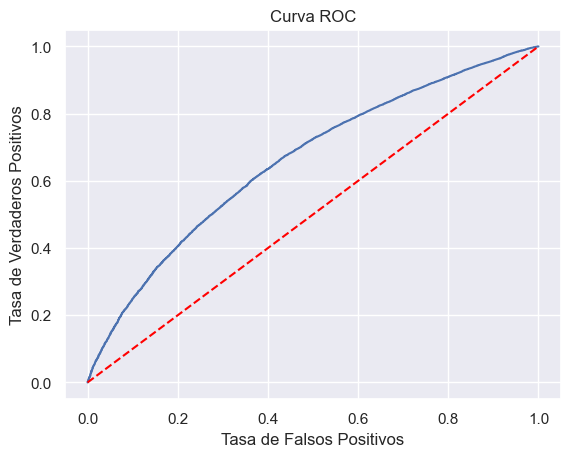

In [139]:
plt.plot(falsos_positivos, verdaderos_positivos) # Definimos los datos del gráfico, falsos x, verdaderos y
plt.plot(falsos_positivos, falsos_positivos, linestyle = '--', color = 'red') # Benchmark (Predictor 50/50)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

In [140]:
# ¿Pero que tan bueno es nuestro modelo?
# Para eso nos sirve la métrica AUC (área bajo la curva)
# Por ejemplo, el AUC del predictor 50/50 es 50%
# Estimemos el AUC de nuestro modelo

In [141]:
AUC = roc_auc_score(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [142]:
AUC

0.6588160554600202

In [ ]:
# ¿Es esto bueno o malo? Bueno, podríamos catalogarlo como regular.

In [144]:
# Si usas sklearn.linear_model.LogisticRegression directamente:
# Ejemplo:
regresion2_sklearn = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
regresion2_sklearn.fit(independiente_entreno, dependiente_entreno.values.ravel())

# Predicciones y probabilidades para Regresión Logística
probabilidad_y_rl = regresion2_sklearn.predict_proba(independiente_evaluacion)[:, 1]
prediccion_y_rl = regresion2_sklearn.predict(independiente_evaluacion)

# Preparar df_prediccion para Regresión Logística
valores_reales_eval_rl = dependiente_evaluacion.copy().reset_index(drop=True)
df_prediccion_rl = pd.concat([valores_reales_eval_rl, pd.DataFrame(probabilidad_y_rl)], axis=1)
df_prediccion_rl.columns = ['Real', 'Proba_Prediccion']
df_prediccion_rl.index = independiente_evaluacion.index
punto_de_corte_rl = 0.5
df_prediccion_rl['Prediccion'] = np.where(df_prediccion_rl['Proba_Prediccion'] > punto_de_corte_rl, 1, 0)


In [145]:
# Nombres de variables específicos para Regresión Logística
fpr_rl_curva, tpr_rl_curva, thresholds_rl_curva = roc_curve(df_prediccion_rl['Real'], df_prediccion_rl['Proba_Prediccion'])
auc_rl = roc_auc_score(df_prediccion_rl['Real'], df_prediccion_rl['Proba_Prediccion'])



# Implentando el modelo Randon Forest

In [146]:
X_train_rf = independiente_entreno
y_train_rf = dependiente_entreno.values.ravel() # Asegurarse de que y sea un array 1D
X_test_rf = independiente_evaluacion
y_test_rf = dependiente_evaluacion.values.ravel()

In [ ]:
# Definir el rango de hiperparámetros a buscar
# Estos son un buen punto de partida. Puedes expandirlos o reducirlos según el tiempo de cómputo y la necesidad.
# param_grid_rf = {
#    'n_estimators': [50, 75],
#    'max_features': ['sqrt', 'log2'],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
# }

# Definir el rango de hiperparámetros a buscar ¡para una pc con parametros conservadores
param_distributions_rf = {
    'n_estimators': [50, 100], # Solo 50 y 100 árboles
    'max_features': ['sqrt'], # Generalmente buen punto de partida, y solo una opción para reducir combinaciones
    'max_depth': [10, 20, None], # Prueba estas profundidades, None puede ser intensivo
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True] # Mantener True para ayudar con la memoria
}

In [148]:
# Inicializar el modelo Random Forest
# 'class_weight balanced' es crucial para manejar el desequilibrio de clases en tu dataset de incumplimiento
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [149]:
# Configurar GridSearchCV para encontrar los mejores hiperparámetros
# 'cv=3' para 3-fold cross-validation. 'scoring=roc_auc' es ideal para datasets desequilibrados.
# 'n_jobs=-1' usa todos los núcleos de tu CPU.
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
#                              cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Configurar RandomizedSearchCV
# n_iter:  Número de combinaciones aleatorias a probar.
#         Empieza con un valor BAJO.
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                      n_iter=20, # ¡Prueba solo 20 combinaciones aleatorias!
                                      cv=3, n_jobs=-1, verbose=2, scoring='roc_auc', random_state=42)

print(f"Iniciando ajuste de hiperparámetros para Random Forest. Se probarán {random_search_rf.n_iter} combinaciones.")
random_search_rf.fit(X_train_rf, y_train_rf)
print("Ajuste de hiperparámetros para Random Forest completado.")

Iniciando ajuste de hiperparámetros para Random Forest. Se probarán 20 combinaciones.
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Ajuste de hiperparámetros para Random Forest completado.


In [150]:
#print("Iniciando ajuste de hiperparámetros para Random Forest...")
#grid_search_rf.fit(X_train_rf, y_train_rf)
#print("Ajuste de hiperparámetros para Random Forest completado.")

# Mostrar los mejores hiperparámetros encontrados
#print("\nMejores hiperparámetros para Random Forest:")
#print(grid_search_rf.best_params_)


# --- MENSAJES DE IMPRESIÓN ACTUALIZADOS ---
print(f"Iniciando ajuste de hiperparámetros para Random Forest con RandomizedSearchCV. Se probarán {random_search_rf.n_iter} combinaciones.")
random_search_rf.fit(X_train_rf, y_train_rf)
print("Ajuste de hiperparámetros para Random Forest con RandomizedSearchCV completado.")


# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Random Forest (obtenidos con RandomizedSearchCV):")
print(random_search_rf.best_params_)

Iniciando ajuste de hiperparámetros para Random Forest con RandomizedSearchCV. Se probarán 20 combinaciones.
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Ajuste de hiperparámetros para Random Forest con RandomizedSearchCV completado.

Mejores hiperparámetros para Random Forest (obtenidos con RandomizedSearchCV):
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [151]:
# Obtener el mejor modelo de Random Forest entrenado
best_rf_model = random_search_rf.best_estimator_

In [152]:
# Realizar predicciones y obtener probabilidades con el mejor modelo de Random Forest
probabilidad_y_rf = best_rf_model.predict_proba(X_test_rf)[:, 1] # Probabilidad de ser la clase positiva (incumplimiento=1)
prediccion_y_rf = best_rf_model.predict(X_test_rf) # Predicción binaria (0 o 1)

# **¡AQUÍ ES DONDE SE DEBE CALCULAR fpr_rf y tpr_rf!**
fpr_rf_curva, tpr_rf_curva, thresholds_rf_curva = roc_curve(y_test_rf, probabilidad_y_rf) # Usamos y_test_rf (valores reales) y las probabilidades

# Preparar DataFrame de predicciones para Random Forest para facilitar la evaluación
valores_reales_eval_rf = dependiente_evaluacion.copy().reset_index(drop = True)
df_prediccion_rf = pd.concat([valores_reales_eval_rf, pd.DataFrame(probabilidad_y_rf)], axis = 1)
df_prediccion_rf.columns = ['Real', 'Proba_Prediccion']
df_prediccion_rf.index = independiente_evaluacion.index

In [153]:
# Calcular Matriz de Confusión para Random Forest (con punto de corte por defecto de 0.5)
punto_de_corte_rf = 0.5
df_prediccion_rf['Prediccion'] = np.where(df_prediccion_rf['Proba_Prediccion'] > punto_de_corte_rf, 1, 0)
matriz_confusion_rf = pd.crosstab(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'],
                                  rownames = ['Valores Reales'], colnames = ['Predicciones'])
print("\n--- Matriz de Confusión para Random Forest (punto de corte 0.5) ---")
print(matriz_confusion_rf)
print("\n--- Matriz de Confusión (%) para Random Forest (punto de corte 0.5) ---")
print(matriz_confusion_rf / df_prediccion_rf.shape[0])

print("\n--- Fin del bloque: Modelo Random Forest ---")



--- Matriz de Confusión para Random Forest (punto de corte 0.5) ---
Predicciones        0      1
Valores Reales              
0                5230   3560
1               30042  54425

--- Matriz de Confusión (%) para Random Forest (punto de corte 0.5) ---
Predicciones           0         1
Valores Reales                    
0               0.056082  0.038174
1               0.322142  0.583602

--- Fin del bloque: Modelo Random Forest ---


# Bloque 2: Medidas de Evaluación y Comparación de Modelos

In [154]:
print("\n--- Iniciando cálculo y comparación de métricas ---")

# --- Recálculo de métricas para Regresión Logística (Asegura que estén actualizadas si hubo cambios) ---
# Si ya las calculaste y las tienes en variables, puedes omitir esta re-declaración y usar tus variables existentes.
# Sin embargo, lo incluyo aquí para asegurar la coherencia si este bloque se ejecuta de forma independiente.
probabilidad_y_rl = regresion2.predict_proba(independiente_evaluacion)[:,1]
prediccion_y_rl = regresion2.predict(independiente_evaluacion)


--- Iniciando cálculo y comparación de métricas ---


In [155]:
# Preparar df_prediccion para Regresión Logística (si no lo hiciste antes de este bloque)
valores_reales_eval_rl = dependiente_evaluacion.copy().reset_index(drop = True)
df_prediccion_rl = pd.concat([valores_reales_eval_rl, pd.DataFrame(probabilidad_y_rl)], axis = 1)
df_prediccion_rl.columns = ['Real', 'Proba_Prediccion']
df_prediccion_rl.index = independiente_evaluacion.index
punto_de_corte_rl = 0.5
df_prediccion_rl['Prediccion'] = np.where(df_prediccion_rl['Proba_Prediccion'] > punto_de_corte_rl, 1, 0)


In [156]:
# --- Métricas para Regresión Logística (aseguradas de estar disponibles de la Sección 3) ---
# auc_rl ya se calculó en la Sección 3
mse_rl = mean_squared_error(df_prediccion_rl['Real'], df_prediccion_rl['Proba_Prediccion'])
precision_rl = precision_score(df_prediccion_rl['Real'], df_prediccion_rl['Prediccion'])
recall_rl = recall_score(df_prediccion_rl['Real'], df_prediccion_rl['Prediccion'])
f1_rl = f1_score(df_prediccion_rl['Real'], df_prediccion_rl['Prediccion'])
logloss_rl = log_loss(df_prediccion_rl['Real'], df_prediccion_rl['Proba_Prediccion'])


In [157]:
# --- Métricas para Random Forest (aseguradas de estar disponibles de la Sección 4) ---
auc_rf = roc_auc_score(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])
mse_rf = mean_squared_error(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])
precision_rf = precision_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
recall_rf = recall_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
f1_rf = f1_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
logloss_rf = log_loss(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])


In [158]:
# Crear un DataFrame para comparar las métricas de ambos modelos
comparacion_metricas = pd.DataFrame({
    'Métrica': [
        'AUC-ROC',
        'Error Cuadrático Medio (MSE)',
        'Precisión (Precision)',
        'Recall (Sensibilidad)',
        'F1-Score',
        'Log Loss' 
    ],
    'Regresión Logística': [
        auc_rl,
        mse_rl,
        precision_rl,
        recall_rl,
        f1_rl,
        logloss_rl
    ],
    'Random Forest (Optimizado)': [
        auc_rf,
        mse_rf,
        precision_rf,
        recall_rf,
        f1_rf,
        logloss_rf
    ]
})

In [159]:
print("\n--- Tabla Comparativa de Métricas de Modelos ---")
print(comparacion_metricas.set_index('Métrica').round(4)) # Redondeamos para mejor visualización



--- Tabla Comparativa de Métricas de Modelos ---
                              Regresión Logística  Random Forest (Optimizado)
Métrica                                                                      
AUC-ROC                                    0.6589                      0.6625
Error Cuadrático Medio (MSE)               0.0831                      0.2283
Precisión (Precision)                      0.9057                      0.9386
Recall (Sensibilidad)                      1.0000                      0.6443
F1-Score                                   0.9505                      0.7641
Log Loss                                   0.2991                      0.6487


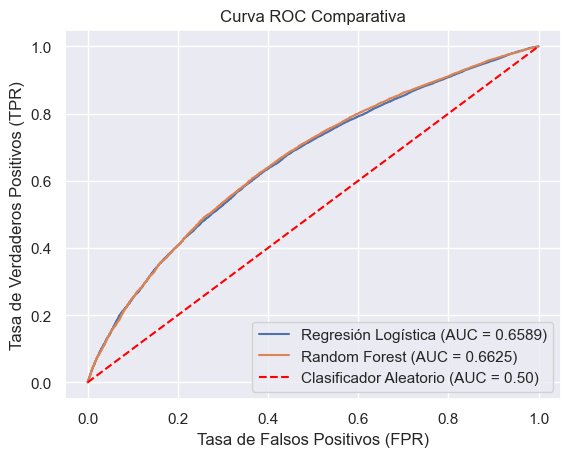

In [160]:
# --- Visualización de Curvas ROC ---
plt.plot(fpr_rl_curva, tpr_rl_curva, label=f'Regresión Logística (AUC = {auc_rl:.4f})')
plt.plot(fpr_rf_curva, tpr_rf_curva, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Clasificador Aleatorio (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
# --- Cálculo y Visualización de Coeficiente de Gini para Random Forest ---
# Ordenar el DataFrame de predicciones de RF para calcular Gini y KS
df_prediccion_rf_sorted = df_prediccion_rf.sort_values('Proba_Prediccion').reset_index(drop=True)
df_prediccion_rf_sorted['Número Acumulado de Clientes'] = df_prediccion_rf_sorted.index + 1
df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos'] = df_prediccion_rf_sorted['Real'].cumsum()
df_prediccion_rf_sorted['Número Acumulado de Clientes Malos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes'] - df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos']
df_prediccion_rf_sorted['% Acumulado Clientes'] = df_prediccion_rf_sorted['Número Acumulado de Clientes'] / df_prediccion_rf_sorted.shape[0]
df_prediccion_rf_sorted['% Acumulado Clientes Buenos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos'] / df_prediccion_rf_sorted['Real'].sum()
df_prediccion_rf_sorted['% Acumulado Clientes Malos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes Malos'] / (df_prediccion_rf_sorted.shape[0] - df_prediccion_rf_sorted['Real'].sum())


In [162]:
gini_rf = auc_rf * 2 - 1
print(f"\nCoeficiente de Gini para Random Forest: {gini_rf:.4f}")


Coeficiente de Gini para Random Forest: 0.3249


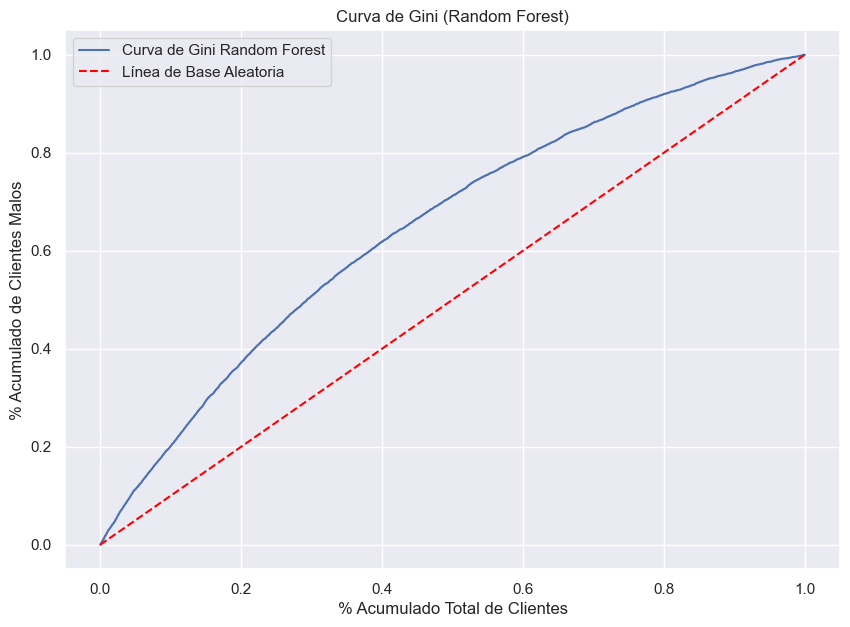

In [163]:

plt.figure(figsize=(10, 7))
plt.plot(df_prediccion_rf_sorted['% Acumulado Clientes'], df_prediccion_rf_sorted['% Acumulado Clientes Malos'], label='Curva de Gini Random Forest')
plt.plot(df_prediccion_rf_sorted['% Acumulado Clientes'], df_prediccion_rf_sorted['% Acumulado Clientes'], linestyle = '--', color = 'red', label='Línea de Base Aleatoria')
plt.xlabel('% Acumulado Total de Clientes')
plt.ylabel('% Acumulado de Clientes Malos')
plt.title('Curva de Gini (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# --- Fin del bloque: Medidas de Evaluación y Comparación ---

# Coeficientes de Gini y Kolgomorov-Smirnov

In [164]:
# Ordenemos el df por las probabilidades en orden ascendente

In [165]:
df_prediccion = df_prediccion.sort_values('Proba_Prediccion')

In [166]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion,Monto
42313,1,0.550621,0,850
39672,0,0.555707,0,3000
42433,1,0.560550,0,3000
42216,1,0.575146,0,600
42350,1,0.597431,0,3600


In [167]:
df_prediccion.tail()

,Real,Proba_Prediccion,Prediccion,Monto
388764,1,0.986537,1,18000
260925,1,0.986908,1,10000
336330,1,0.987087,1,12000
334474,1,0.988293,1,9300
454676,0,0.988752,1,15000


In [168]:
# Para calcular la proporción acumulativa, tenemos que reindexar el df con el orden
# ascendente de probababilidad que tenemos. Queremos que la observación con la menor
# probabilidad tenga un índice de 0, la siguiente uno y así sucesivamente
# Utilizamos en método .reset_index()

In [169]:
df_prediccion = df_prediccion.reset_index()

In [170]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto
0,42313,1,0.550621,0,850
1,39672,0,0.555707,0,3000
2,42433,1,0.560550,0,3000
3,42216,1,0.575146,0,600
4,42350,1,0.597431,0,3600


In [171]:
# Notemos que como sobreescribimos el índice sin utilizar drop = True, se generó automáticamente
# una columna index que preserva los índices originales. Podemos utilizar estos últimos para 
# saber quien es cada cliente.

In [172]:
# Para hacer los gráficos del desempeño de nuestro modelo necesitamos:
# 1. El porcentaje acumulado del total de clientes
# 2. El porcentaje acumulado de los clientes buenos
# 3. El porcentaje acumulado de los clientes malos
# Antes de estimar el porcentaje, calculemos en número (n) de ellos

In [173]:
# Acumulado del total de clientes: suma de los índices

In [174]:
df_prediccion['Número Acumulado de Clientes'] = df_prediccion.index + 1

In [175]:
# Acumulado del total de clientes buenos: como 'Real' de buenos-malos es una variable binaria
# que toma el valor de 1 cuando el cliente es bueno, lo único que tenemos que hacer es hacer
# la suma acumulada de dicha variable utilizando el método .cumsum

In [176]:
df_prediccion['Número Acumulado de Clientes Buenos'] = df_prediccion['Real'].cumsum()

In [177]:
# Acumulado del total de clientes malos: No podemos sumar los ceros acumulados (siempre sería cero).
# Pero para cada fila conocemos el número total de clientes acumulado y el total de clientes buenos
# acumulados. El acumulado de clientes malos debería ser la diferencia entre estos dos números

In [178]:
df_prediccion['Número Acumulado de Clientes Malos'] = df_prediccion['Número Acumulado de Clientes'] - df_prediccion['Número Acumulado de Clientes Buenos']

In [179]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
0,42313,1,0.550621,0,850,1,1,0
1,39672,0,0.555707,0,3000,2,1,1
2,42433,1,0.560550,0,3000,3,2,1
3,42216,1,0.575146,0,600,4,3,1
4,42350,1,0.597431,0,3600,5,4,1


In [180]:
df_prediccion.tail()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
93252,388764,1,0.986537,1,18000,93253,84464,8789
93253,260925,1,0.986908,1,10000,93254,84465,8789
93254,336330,1,0.987087,1,12000,93255,84466,8789
93255,334474,1,0.988293,1,9300,93256,84467,8789
93256,454676,0,0.988752,1,15000,93257,84467,8790


In [181]:
# Una ves hemos estimado en número acumulado, debemos estimar la proporción acumulada
# Para el % Acumulado de Clientes dividimos el Número Acumulado de Clientes / Total de Clientes

In [182]:
df_prediccion['% Acumulado Clientes'] = df_prediccion['Número Acumulado de Clientes'] / df_prediccion.shape[0]

In [183]:
# Para los el % Acumulado de Clientes Buenos dividimos el Número Acumulado de Clientes Buenos / Total de Clientes Buenos

In [184]:
df_prediccion['% Acumulado Clientes Buenos'] = df_prediccion['Número Acumulado de Clientes Buenos'] / df_prediccion['Real'].sum()

In [185]:
# Para los el % Acumulado de Clientes Buenos dividimos el Número Acumulado de Clientes Malos / Total de Clientes Malos

In [186]:
df_prediccion['% Acumulado Clientes Malos'] = df_prediccion['Número Acumulado de Clientes Malos'] / (df_prediccion.shape[0] - df_prediccion['Real'].sum())

In [187]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos,% Acumulado Clientes,% Acumulado Clientes Buenos,% Acumulado Clientes Malos
0,42313,1,0.550621,0,850,1,1,0,0.000011,0.000012,0.000000
1,39672,0,0.555707,0,3000,2,1,1,0.000021,0.000012,0.000114
2,42433,1,0.560550,0,3000,3,2,1,0.000032,0.000024,0.000114
3,42216,1,0.575146,0,600,4,3,1,0.000043,0.000036,0.000114
4,42350,1,0.597431,0,3600,5,4,1,0.000054,0.000047,0.000114


In [188]:
# Coeficientes de Gini y Kolgomorov-Smirnov. Sesión B.

In [189]:
# En la sesión anterior calculamos los % acumulados, que es todo lo que necesitamos para hacer los
# gráficos y estimar los coeficientes de Gini y K-S
# Comencemos con el gráfico de Gini que es el % Acumulado de Malos (eje Y) como función del % Acumulado del total (eje X)

Text(0.5, 1.0, 'Curva de Gini')

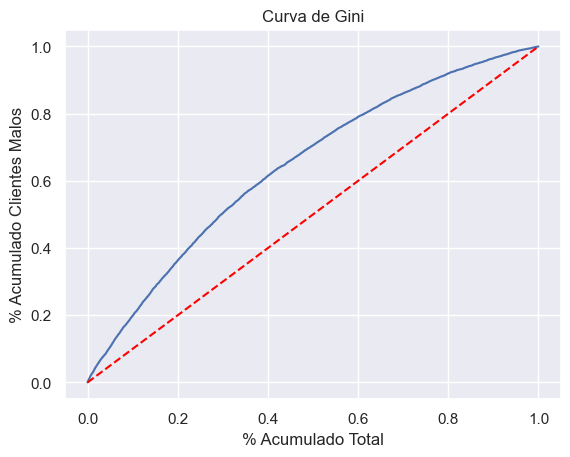

In [190]:
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes Malos'])
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes'], linestyle = '--', color = 'red') # Benchmark de predicción aleatoria 50-50
plt.xlabel('% Acumulado Total')
plt.ylabel('% Acumulado Clientes Malos')
plt.title('Curva de Gini')

In [191]:
# Seguramente han notado las similitudes entre el gráfico de GINI y el AUC
# De hecho, el coeficiente de Gini puede ser expresado como
# GINI = AUC*2-1

In [192]:
Coef_Gini = AUC*2-1
Coef_Gini

0.3176321109200404

In [193]:
# Un valor de Gini de 0 indicaría que los consumidores morosos se distribuyen equitativamente en 
# todo el rango de scoring; en otras palabras, que el puntaje crediticio no asignó puntajes 
# crediticios más bajos a más consumidores que incumplieron, como un indicador con más poder  
# predictivo haría. Un valor de coeficiente de 100% indicaría que a todos los consumidores 
# morosos se les asignaron con éxito las puntuaciones más bajas posibles. 
# Los coeficientes de Gini de 45% o más se consideran indicadores de una fuerte precisión 
# en la calificación crediticia.

In [194]:
# Ahora hagamos el gráfico K-S
# Recordemos, el estadístico K-S mide la distancia (sobre el eje Y) de dos funciones de distribución
# acumulativas. A mayor distancia, mejor es la característia que los distingue. En nuestro caso específico
# las funciones son:
# % Acumulado de Buenos Clientes como función de la Probabilidad de ser bueno (Proba_Prediccion)
# % Acumulado de Malos Clientes como función de la Probabilidad de ser bueno
# Si el modelo fuera perfecto: Distancia máxima = 1
# Un modelo de predicción aleatorio: Distancia tendiendo a cero
# Hagamos el gráfico

Text(0.5, 1.0, 'Kolgomorov-Smirnov')

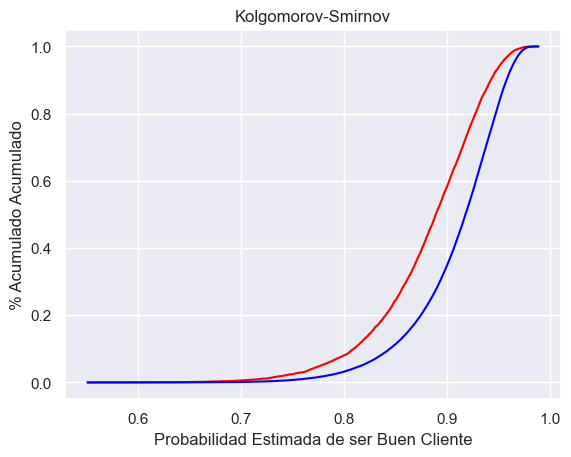

In [195]:
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Malos'], color = 'red')
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Buenos'], color = 'blue')
plt.xlabel('Probabilidad Estimada de ser Buen Cliente')
plt.ylabel('% Acumulado Acumulado')
plt.title('Kolgomorov-Smirnov')

In [196]:
# El coeficiente K-S es la distancia (vertical) máxima entre la curva roja y la curva azul
# La podemos calcular con los datos del df: el máximo de la diferencia entre el % acumulado de los malos
# menos el % acumulado de los buenos:

In [197]:
Coef_KS = max(df_prediccion['% Acumulado Clientes Malos']-df_prediccion['% Acumulado Clientes Buenos'])

In [198]:
Coef_KS

0.238073605712259

In [199]:
# No se acerca a 1 pero es significativamente mayor que cero.
# Las dos distribuciones acumulativas están lo suficientemente distantes. Podemos afirmar que el
# modelo tienen un poder de predicción satisfactorio

In [200]:
independientes_evaluacion.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti_19.9-20.8,dti_20.8-23.2,dti_23.2-35.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_0-3,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,0,1,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,0,1,0,1,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,0,1,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,0,1,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,0,1,0,0,0,0,0
